In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
df = pd.read_csv("../input/train.csv")
y = df.SalePrice.values
categorical = ['SalePrice', 'LotFrontage', 'Neighborhood', 'MasVnrArea', 'ExterQual',
       'BsmtQual', 'KitchenQual', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish',
       'OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']
df = df.fillna("None") #make the ones with nan objects so that they can be re encoded with nan included
class PrepareData:
    def __init__(self, df, cat):
        self.df = df[cat+["Id"]]
        self.categories = cat
        print(self.df.select_dtypes("object").columns)
    def encode(self):
        catDf = self.df[list(self.df.select_dtypes("object").columns) + ["Id","SalePrice"]]
        for x in self.df.select_dtypes("object").columns:
            kf = self.df.groupby(x)["SalePrice"].mean().to_frame().sort_values("SalePrice")
            kf = kf.reset_index().reset_index().rename(columns={"index":x+"Encoded"}).drop(columns=["SalePrice"])
            catDf = catDf.merge(kf, on=x, how="left")
        self.catDf = catDf
        catDf = catDf[[x for x in catDf.columns if "Encode" in x or x in ["SalePrice","Id"]]]
        catDf.columns = [x.split("Encoded")[0] for x in catDf.columns]
        self.df = catDf.merge(self.df.select_dtypes(include=['float64',"int64"]), on=["Id","SalePrice"])
obj = PrepareData(df, categorical)
obj.encode()
df = obj.df

Index(['LotFrontage', 'Neighborhood', 'MasVnrArea', 'ExterQual', 'BsmtQual',
       'KitchenQual', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish'],
      dtype='object')


In [3]:
X = df.iloc[:,2:]

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

model = lm.fit(x_train, y_train)

y_predict= lm.predict(x_test)

In [6]:
from sklearn.metrics import r2_score
print("Test score:")
r2_score(y_test, y_predict)


Test score:


0.8431824004863517

In [13]:
pd.DataFrame(
    {
        'Feature': X.columns,
        'Coefficient': model.coef_
    }
)

,Feature,Coefficient
0,LotFrontage,238.025108
1,Neighborhood,2016.249362
2,MasVnrArea,150.205176
3,ExterQual,5714.233489
4,BsmtQual,9423.488587
5,KitchenQual,12500.586574
6,FireplaceQu,2606.733468
7,GarageYrBlt,17.422576
8,GarageFinish,1596.228997
9,OverallQual,9344.473895


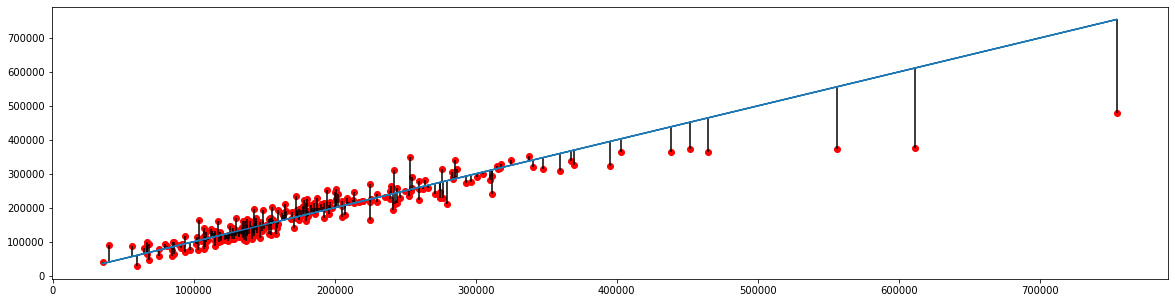

In [11]:
fig, ax = plt.subplots(figsize=(20,5))
x = y_test
y = y_predict
dy = y_test
ax.plot(x,dy)
ax.scatter(x,y,color="red")
ax.vlines(x,x,y)
plt.show()